# The Battle of the Neighborhoods - Week 2
## Part 1 Download and Explore New York city geographical coordinates dataset

Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood.

Luckily, this dataset exists for free on the web. Link to the dataset: https://geo.nyu.edu/catalog/nyu_2451_34572

First, let's download all the dependencies that we will need.

In [31]:

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

 # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from bs4 import BeautifulSoup
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors


import folium # map rendering library

import csv # implements classes to read and write tabular data in CSV form

print('Libraries imported.')

Libraries imported.


In [1]:
!wget -q -O 'newyork_data.json' https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json
print('Data downloaded!')

Data downloaded!


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
neighborhoods_data = newyork_data['features']

In [5]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [6]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [7]:

neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [8]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [9]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [10]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [11]:

neighborhoods.to_csv('BON1_NYC_GEO.csv',index=False)

In [7]:
!pip install geopy

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [2]:
pip install beautifulsoup4

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [ ]:
conda install -c conda-forge folium

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / 

In [1]:
!pip install folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [11]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [13]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [14]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


The json file is downloaded and it is placed on the server. So run a wget command and access the data.

In [17]:

!wget -q -O 'newyork_data.json' https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json
print('Data downloaded!')

Data downloaded!


#### Load and explore the data

In [18]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)


All the relevant data is in the features key, which is basically a list of the neighborhoods. So, define a new variable that includes this data.

In [19]:
neighborhoods_data = newyork_data['features']

Take a look at the first item in this list

In [20]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Tranform the data into a pandas dataframe

The next task is essentially transforming this data of nested Python dictionaries into a pandas dataframe. Start by creating an empty dataframe.

In [21]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [22]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude



Then loop through the data and fill the dataframe one row at a time.

In [23]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [24]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585



Let's make sure that the dataset has all 5 boroughs and 306 neighborhoods.

In [25]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [26]:
neighborhoods.to_csv('BON1_NYC_GEO.csv',index=False)

#### Use geopy library to get the latitude and longitude values of New York City.

In [27]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.

In [28]:
# create map of Toronto using latitude and longitude values
map_NewYork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NewYork)  
    
map_NewYork

## Part 2 Web scrapping of Population and Demographics data of New York city from Wikipedia¶

A : POPULATION DATA
Web scrapping of Population data from wikipedia page - https://en.wikipedia.org/wiki/New_York_City



#### Web scrapping of Population data from wikipedia page using BeautifulSoup.

Beautiful Soup is a Python package for parsing HTML and XML documents (including having malformed markup, i.e. non-closed tags, so named after tag soup). It creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping.

In [32]:
website_url = requests.get('https://en.wikipedia.org/wiki/Demographics_of_New_York_City').text
soup = BeautifulSoup(website_url,'lxml')
table = soup.find('table',{'class':'wikitable sortable'})
#print(soup.prettify())

headers = [header.text for header in table.find_all('th')]

table_rows = table.find_all('tr')        
rows = []
for row in table_rows:
   td = row.find_all('td')
   row = [row.text for row in td]
   rows.append(row)

with open('BON2_POPULATION1.csv', 'w') as f:
   writer = csv.writer(f)
   writer.writerow(headers)
   writer.writerows(row for row in rows if row)

#### Load data from CSV

In [33]:
Pop_data=pd.read_csv('BON2_POPULATION1.csv')
Pop_data.drop(Pop_data.columns[[7,8,9,10,11]], axis=1,inplace=True)
print('Data downloaded!')

Data downloaded!


##### Remove whitespaces and rename columns

In [34]:
Pop_data.columns = Pop_data.columns.str.replace(' ', '')
Pop_data.columns = Pop_data.columns.str.replace('\'','')
Pop_data.rename(columns={'Borough':'persons_sq_mi','County':'persons_sq_km'}, inplace=True)
Pop_data

,NewYorkCitysfiveboroughsvte\n,Jurisdiction\n,Population\n,GDP\n,Landarea\n,Density\n,persons_sq_mi,persons/mi2,persons/km2\n
0,The Bronx\n,\n Bronx\n,"1,418,207\n",42.695\n,42.10\n,109.04\n,"33,867\n",NaN,NaN
1,Brooklyn\n,\n Kings\n,"2,559,903\n",91.559\n,70.82\n,183.42\n,"36,147\n",NaN,NaN
2,Manhattan\n,\n New York\n,"1,628,706\n",600.244\n,22.83\n,59.13\n,"71,341\n",NaN,NaN
3,Queens\n,\n Queens\n,"2,253,858\n",93.310\n,108.53\n,281.09\n,"20,767\n",NaN,NaN
4,Staten Island\n,\n Richmond\n,"476,143\n",14.514\n,58.37\n,151.18\n,"8,157\n",NaN,NaN
5,City of New York,"8,336,817",842.343,302.64,783.83,"27,547","10,636\n",NaN,NaN
6,State of New York,"19,453,561","1,731.910","47,126.40","122,056.82",412,159\n,NaN,NaN
7,Sources:[12][13][14] and see individual boroug...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
Pop_data.rename(columns = {'NewYorkCitysfiveboroughsvte\n' : 'Borough',
                   'Jurisdiction\n':'County',
                   'Population\n':'Estimate_2017', 
                   'Landarea\n':'square_miles',
                    'Density\n':'square_km'}, inplace=True)
Pop_data

,Borough,County,Estimate_2017,GDP\n,square_miles,square_km,persons_sq_mi,persons/mi2,persons/km2\n
0,The Bronx\n,\n Bronx\n,"1,418,207\n",42.695\n,42.10\n,109.04\n,"33,867\n",NaN,NaN
1,Brooklyn\n,\n Kings\n,"2,559,903\n",91.559\n,70.82\n,183.42\n,"36,147\n",NaN,NaN
2,Manhattan\n,\n New York\n,"1,628,706\n",600.244\n,22.83\n,59.13\n,"71,341\n",NaN,NaN
3,Queens\n,\n Queens\n,"2,253,858\n",93.310\n,108.53\n,281.09\n,"20,767\n",NaN,NaN
4,Staten Island\n,\n Richmond\n,"476,143\n",14.514\n,58.37\n,151.18\n,"8,157\n",NaN,NaN
5,City of New York,"8,336,817",842.343,302.64,783.83,"27,547","10,636\n",NaN,NaN
6,State of New York,"19,453,561","1,731.910","47,126.40","122,056.82",412,159\n,NaN,NaN
7,Sources:[12][13][14] and see individual boroug...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Replace newline('\n') from each string from left and right sides

In [37]:
Pop_data['Borough']=Pop_data['Borough'].replace(to_replace='\n', value='', regex=True)
Pop_data['County']=Pop_data['County'].replace(to_replace='\n', value='', regex=True)
Pop_data['Estimate_2017']=Pop_data['Estimate_2017'].replace(to_replace='\n', value='', regex=True)
Pop_data['square_miles']=Pop_data['square_miles'].replace(to_replace='\n', value='', regex=True)
Pop_data['square_km']=Pop_data['square_km'].replace(to_replace='\n', value='', regex=True)
Pop_data['persons_sq_mi']=Pop_data['persons_sq_mi'].replace(to_replace='\n', value='', regex=True)
Pop_data['persons_sq_km']=Pop_data['persons/mi2'].replace(to_replace='\n', value='', regex=True)
Pop_data

,Borough,County,Estimate_2017,GDP\n,square_miles,square_km,persons_sq_mi,persons/mi2,persons/km2\n,persons_sq_km
0,The Bronx,Bronx,"1,418,207",42.695\n,42.10,109.04,"33,867",NaN,NaN,NaN
1,Brooklyn,Kings,"2,559,903",91.559\n,70.82,183.42,"36,147",NaN,NaN,NaN
2,Manhattan,New York,"1,628,706",600.244\n,22.83,59.13,"71,341",NaN,NaN,NaN
3,Queens,Queens,"2,253,858",93.310\n,108.53,281.09,"20,767",NaN,NaN,NaN
4,Staten Island,Richmond,"476,143",14.514\n,58.37,151.18,"8,157",NaN,NaN,NaN
5,City of New York,"8,336,817",842.343,302.64,783.83,"27,547","10,636",NaN,NaN,NaN
6,State of New York,"19,453,561","1,731.910","47,126.40","122,056.82",412,159,NaN,NaN,NaN
7,Sources:[12][13][14] and see individual boroug...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



##### Shift data in the last two rows

In [38]:
Pop_data.loc[5:,['persons_sq_mi','persons_sq_km']] = Pop_data.loc[2:,['persons_sq_mi','persons_sq_km']].shift(1,axis=1)
Pop_data.loc[5:,['square_km','persons_sq_mi']] = Pop_data.loc[2:,['square_km','persons_sq_mi']].shift(1,axis=1)
Pop_data.loc[5:,['square_miles','square_km']] = Pop_data.loc[2:,['square_miles','square_km']].shift(1,axis=1)
Pop_data.loc[5:,['Estimate_2017','square_miles']] = Pop_data.loc[2:,['Estimate_2017','square_miles']].shift(1,axis=1)
Pop_data.loc[5:,['County','Estimate_2017']] = Pop_data.loc[2:,['County','Estimate_2017']].shift(1,axis=1)
Pop_data.loc[5:,['Borough','County']] = Pop_data.loc[2:,['Borough','County']].shift(1,axis=1)
Pop_data

,Borough,County,Estimate_2017,GDP\n,square_miles,square_km,persons_sq_mi,persons/mi2,persons/km2\n,persons_sq_km
0,The Bronx,Bronx,"1,418,207",42.695\n,42.10,109.04,"33,867",NaN,NaN,NaN
1,Brooklyn,Kings,"2,559,903",91.559\n,70.82,183.42,"36,147",NaN,NaN,NaN
2,Manhattan,New York,"1,628,706",600.244\n,22.83,59.13,"71,341",NaN,NaN,NaN
3,Queens,Queens,"2,253,858",93.310\n,108.53,281.09,"20,767",NaN,NaN,NaN
4,Staten Island,Richmond,"476,143",14.514\n,58.37,151.18,"8,157",NaN,NaN,NaN
5,NaN,City of New York,"8,336,817",302.64,842.343,783.83,"27,547",NaN,NaN,NaN
6,NaN,State of New York,"19,453,561","47,126.40","1,731.910","122,056.82",412,NaN,NaN,NaN
7,NaN,Sources:[12][13][14] and see individual boroug...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Removing 'NAN'

In [39]:
Pop_data = Pop_data.fillna('')
Pop_data

,Borough,County,Estimate_2017,GDP\n,square_miles,square_km,persons_sq_mi,persons/mi2,persons/km2\n,persons_sq_km
0,The Bronx,Bronx,"1,418,207",42.695\n,42.10,109.04,"33,867",,,
1,Brooklyn,Kings,"2,559,903",91.559\n,70.82,183.42,"36,147",,,
2,Manhattan,New York,"1,628,706",600.244\n,22.83,59.13,"71,341",,,
3,Queens,Queens,"2,253,858",93.310\n,108.53,281.09,"20,767",,,
4,Staten Island,Richmond,"476,143",14.514\n,58.37,151.18,"8,157",,,
5,,City of New York,"8,336,817",302.64,842.343,783.83,"27,547",,,
6,,State of New York,"19,453,561","47,126.40","1,731.910","122,056.82",412,,,
7,,Sources:[12][13][14] and see individual boroug...,,,,,,,,


##### Drop the last row

In [40]:
i = Pop_data[((Pop_data.County == 'Sources: [2] and see individual borough articles'))].index
Pop_data.drop(i)

,Borough,County,Estimate_2017,GDP\n,square_miles,square_km,persons_sq_mi,persons/mi2,persons/km2\n,persons_sq_km
0,The Bronx,Bronx,"1,418,207",42.695\n,42.10,109.04,"33,867",,,
1,Brooklyn,Kings,"2,559,903",91.559\n,70.82,183.42,"36,147",,,
2,Manhattan,New York,"1,628,706",600.244\n,22.83,59.13,"71,341",,,
3,Queens,Queens,"2,253,858",93.310\n,108.53,281.09,"20,767",,,
4,Staten Island,Richmond,"476,143",14.514\n,58.37,151.18,"8,157",,,
5,,City of New York,"8,336,817",302.64,842.343,783.83,"27,547",,,
6,,State of New York,"19,453,561","47,126.40","1,731.910","122,056.82",412,,,
7,,Sources:[12][13][14] and see individual boroug...,,,,,,,,


##### save dataframe as csv file

In [45]:
Pop_data.to_csv('BON2_POPULATION.csv',index=False)

In [47]:
website_url = requests.get('https://en.wikipedia.org/wiki/New_York_City').text
soup = BeautifulSoup(website_url,'lxml')
table = soup.find('table',{'class':'wikitable sortable collapsible'})
#print(soup.prettify())

headers = [header.text for header in table.find_all('th')]

table_rows = table.find_all('tr')        
rows = []
for row in table_rows:
   td = row.find_all('td')
   row = [row.text for row in td]
   rows.append(row)

with open('NYC_DEMO.csv', 'w') as f:
   writer = csv.writer(f)
   writer.writerow(headers)
   writer.writerows(row for row in rows if row)

AttributeError: 'NoneType' object has no attribute 'find_all'

In [44]:
Demo_data=pd.read_csv('NYC_DEMO.csv')
print('Data downloaded!')

FileNotFoundError: [Errno 2] File NYC_DEMO.csv does not exist: 'NYC_DEMO.csv'


### Part 3 Download and Explore New York city and its Boroughs Cuisine dataset
##### Download all the dependencies that is need.

In [48]:
!pip install wordcloud

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 366 kB 19.8 MB/s eta 0:00:01


In [49]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from PIL import Image # converting images into arrays

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0



# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Matplotlib version:  3.2.2
Wordcloud is installed and imported!


In [52]:
# Fetch the file
my_file = project.get_file("BON3_NYC_CUISINE.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
NYC_CUISINE=pd.read_csv(my_file)
NYC_CUISINE.drop(NYC_CUISINE.columns[[3,4,5,6,7]], axis=1,inplace=True) 
NYC_CUISINE.head()

NameError: name 'project' is not defined

In [53]:
NYC_CUISINE.shape

NameError: name 'NYC_CUISINE' is not defined

In [54]:

print(NYC_CUISINE.Borough.unique())

NameError: name 'NYC_CUISINE' is not defined

In [55]:
NYC_CUISINE['Borough'].value_counts().to_frame()

NameError: name 'NYC_CUISINE' is not defined

In [56]:
CUISINE_WC = NYC_CUISINE[['Cuisine']]
CUISINE_WC

NameError: name 'NYC_CUISINE' is not defined

In [57]:
CUISINE_WC.to_csv('CUISINE_WC.txt', sep=',', index=False)

NameError: name 'CUISINE_WC' is not defined

In [58]:
CUISINE_WC1 = open('CUISINE_WC.txt', 'r').read()

FileNotFoundError: [Errno 2] No such file or directory: 'CUISINE_WC.txt'

In [59]:
stopwords = set(STOPWORDS)

In [60]:
# instantiate a word cloud object
NYC_CUISINE_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_WC.generate(CUISINE_WC1)

NameError: name 'CUISINE_WC1' is not defined

ValueError: WordCloud has not been calculated, call generate first.

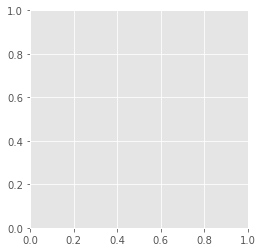

In [61]:
# display the word cloud
plt.imshow(NYC_CUISINE_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

### Part 4 Download and Explore Farmers Market dataset
##### Download all the dependencies needed

In [62]:
!pip install seaborn

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
